In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('band_gap.csv')
df.head()

,Unnamed: 0,precursor_concentration,reaction_temperature,deposition_rate,annealing_temperature,bandgap,stability
0,0,0.218543,106.285837,1.640876,107.752258,3.542568,53.161600
1,1,0.477821,227.282082,0.301936,179.703195,4.167431,29.394534
2,2,0.379397,162.871196,0.487909,181.095268,3.754988,44.666559
3,3,0.319396,201.714138,2.256530,195.614485,4.408397,59.481263
4,4,0.120208,281.513295,1.555430,208.913700,5.811197,61.900390


Predicted Bandgap: [5.7451644 3.7607179 4.291942  3.343689  4.4452796 5.151216  4.567552
 3.3762302 4.4245815 3.501027  5.1290965 4.0371914 3.402913  3.301709
 4.046219  5.740217  4.3160777 4.422684  4.390554  4.43625  ]
Mean Squared Error: 0.02764716998111827


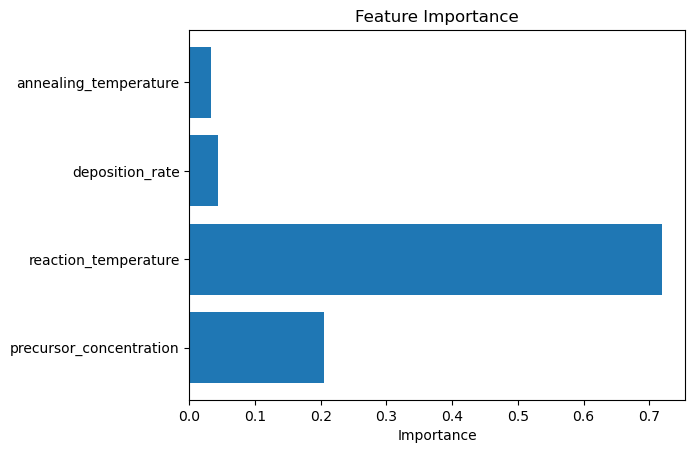

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Optimized Predicted Bandgap: [5.784693  3.6669116 4.111563  3.4073637 4.3009114 4.9869165 4.523305
 3.2744112 4.1785574 3.442191  4.917431  4.145642  3.4009109 3.1602213
 4.4770427 5.742329  4.46967   4.2301254 4.4429564 4.395181 ]
Optimized Mean Squared Error: 0.017330450180779396


In [4]:
# Features (X) and Target variables (y)
X = df[['precursor_concentration', 'reaction_temperature', 'deposition_rate', 'annealing_temperature']]
y = df['bandgap']  # Let's predict bandgap

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost model
model = XGBRegressor(n_estimators=200, learning_rate=0.05, max_depth=5, random_state=42)

# Fit the model
model.fit(X_train, y_train)

# Predicting and evaluating the model
y_pred = model.predict(X_test)
print("Predicted Bandgap:", y_pred)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

# Feature importance using the trained model
feature_importances = model.feature_importances_

# Plot feature importances
plt.barh(range(len(feature_importances)), feature_importances)
plt.yticks(range(len(feature_importances)), ['precursor_concentration', 'reaction_temperature', 
                                             'deposition_rate', 'annealing_temperature'])
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 150, 200]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Best hyperparameters found
print("Best Hyperparameters:", grid_search.best_params_)

# Evaluate the best model
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
print("Optimized Predicted Bandgap:", y_pred_best)
print("Optimized Mean Squared Error:", mean_squared_error(y_test, y_pred_best))


IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


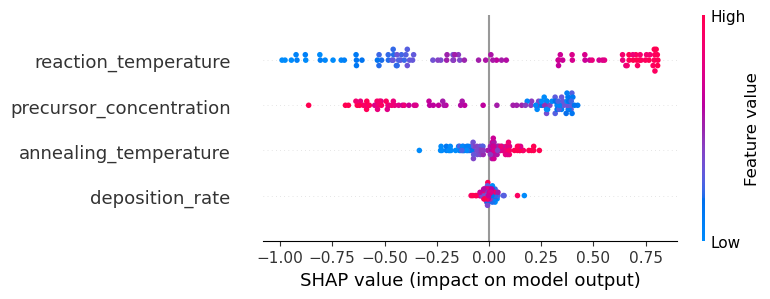

In [5]:
import shap

# Assuming 'X' is your feature dataset used for training
# Create the SHAP explainer
explainer = shap.Explainer(model)
shap_values = explainer(X)

# Plot the SHAP summary
shap.summary_plot(shap_values, X)